<a href="https://colab.research.google.com/github/JSEFERINO/Estadistica_Moderna/blob/main/90_DOE_3_x_2_a_2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# ***Diseños factoriales con tres factores***

## ***1. El Problema: Ejemplo 5.3, página 144***
###**Problema de aplicación.** *Se desea investigar el efecto del tipo de suspensión (A), abertura de malla (B) y temperatura de ciclaje (C) en el volumen de sedimentación Y(%) de una suspensión. Para ello se decide correr un experimento factorial _3 × 2 × 2_ con seis réplicas, y las observaciones obtenidas en las 72 corridas experimentales se muestran en la siguiente tabla:

# **2. Librerias a usar**

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# **3. Ingresando los datos del problema a Python**

In [ ]:
tipo_suspensión_A  =  [ "A1",  "A2",  "A3" ]
abertura_malla_B  =  [ "B1" ,  "B2" ]
temperatura_ciclaje_C  =  [ "C1" ,  "C2" ]
volumen_Y = [60, 75, 75, 86, 70, 70, 55, 53, 53, 55, 55, 55, 67, 73, 73, 67, 68, 68, 52, 52, 57, 52, 54, 54, 62, 68, 65, 76, 65, 65, 44, 44, 45, 48, 48, 45, 71, 80, 80, 80, 80, 72, 60, 60, 60, 67, 67, 65, 76, 71, 75, 70, 68, 73, 52, 51, 50, 52, 48, 54, 75, 75, 75, 75, 75, 77, 56, 55, 57, 59, 50, 55]

In [ ]:
tipo_suspensión_A = ["A1"] * 24 + ["A2"] * 24 + ["A3"] * 24

abertura_malla_B = (["B1"] * 12 + ["B2"] * 12 ) * 3
temperatura_ciclaje_C = (["C1"] * 6 + ["C2"] * 6) * 6

In [ ]:
datos  = pd.DataFrame({    'tipo_suspensión_A': tipo_suspensión_A,    'abertura_malla_B': abertura_malla_B,   'temperatura_ciclaje_C': temperatura_ciclaje_C, 'volumen_Y': volumen_Y})

In [ ]:
datos.head(72)

,tipo_suspensión_A,abertura_malla_B,temperatura_ciclaje_C,volumen_Y
0,A1,B1,C1,60
1,A1,B1,C1,75
2,A1,B1,C1,75
3,A1,B1,C1,86
4,A1,B1,C1,70
...,...,...,...,...
67,A3,B2,C2,55
68,A3,B2,C2,57
69,A3,B2,C2,59
70,A3,B2,C2,50


# **4. Análisis descriptivos - Box_Plots**

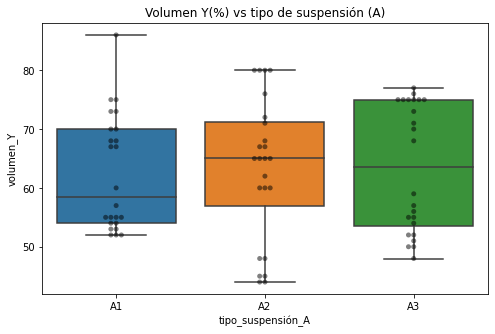

In [ ]:
fig, ax = plt.subplots(1, 1, figsize=(8, 5))
ax.set_title('Volumen Y(%) vs tipo de suspensión (A)')
sns.boxplot(x="tipo_suspensión_A", y="volumen_Y", data=datos, ax=ax)
sns.swarmplot(x="tipo_suspensión_A", y="volumen_Y", data=datos, color='black', alpha=0.5, ax=ax);


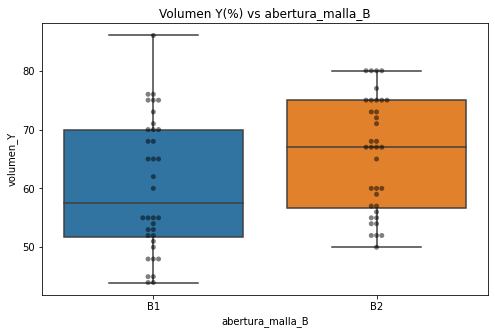

In [ ]:
fig, ax = plt.subplots(1, 1, figsize=(8, 5))
ax.set_title('Volumen Y(%) vs abertura_malla_B')
sns.boxplot(x="abertura_malla_B", y="volumen_Y", data=datos, ax=ax)
sns.swarmplot(x="abertura_malla_B", y="volumen_Y", data=datos, color='black', alpha=0.5, ax=ax);

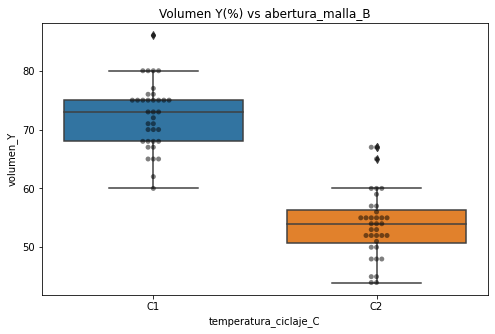

In [ ]:
fig, ax = plt.subplots(1, 1, figsize=(8, 5))
ax.set_title('Volumen Y(%) vs abertura_malla_B')
sns.boxplot(x="temperatura_ciclaje_C", y="volumen_Y", data=datos, ax=ax)
sns.swarmplot(x="temperatura_ciclaje_C", y="volumen_Y", data=datos, color='black', alpha=0.5, ax=ax);

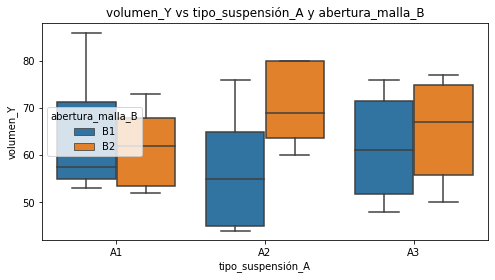

In [ ]:
fig, ax = plt.subplots(1, 1, figsize=(8, 4))
ax.set_title('volumen_Y vs tipo_suspensión_A y abertura_malla_B')
sns.boxplot(x="tipo_suspensión_A", y="volumen_Y", hue='abertura_malla_B', data=datos, ax=ax);

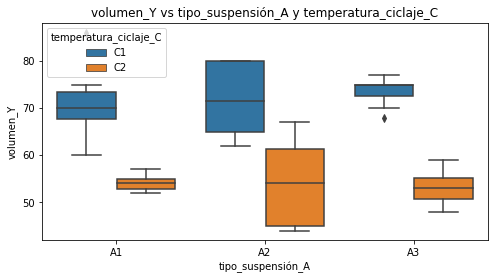

In [ ]:
fig, ax = plt.subplots(1, 1, figsize=(8, 4))
ax.set_title('volumen_Y vs tipo_suspensión_A y temperatura_ciclaje_C')
sns.boxplot(x="tipo_suspensión_A", y="volumen_Y", hue='temperatura_ciclaje_C', data=datos, ax=ax);

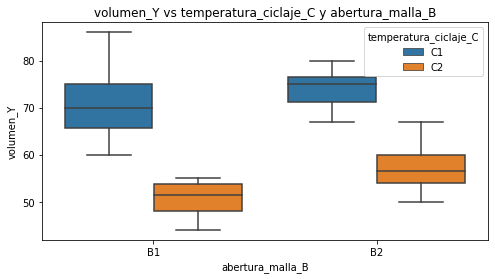

In [ ]:
fig, ax = plt.subplots(1, 1, figsize=(8, 4))
ax.set_title('volumen_Y vs temperatura_ciclaje_C y abertura_malla_B')
sns.boxplot(x="abertura_malla_B", y="volumen_Y", hue='temperatura_ciclaje_C', data=datos, ax=ax);

# **5. Análisis descriptivos - Medidas descriptivas**

In [ ]:
print('volumen_Y media y desviación típica para tipo_suspensión_A, abertura_malla_B, temperatura_ciclaje_C ')
datos.groupby(['tipo_suspensión_A', 'abertura_malla_B', 'temperatura_ciclaje_C'])['volumen_Y'].agg(['mean', 'std'])

volumen_Y media y desviación típica para tipo_suspensión_A, abertura_malla_B, temperatura_ciclaje_C 


mean       std
tipo_suspensión_A abertura_malla_B temperatura_ciclaje_C                     
A1                B1               C1                     72.666667  8.524475
                                   C2                     54.333333  1.032796
                  B2               C1                     69.333333  2.875181
                                   C2                     53.500000  1.974842
A2                B1               C1                     66.833333  4.875107
                                   C2                     45.666667  1.861899
                  B2               C1                     77.166667  4.400758
                                   C2                     63.166667  3.544949
A3                B1               C1                     72.166667  3.060501
                                   C2                     51.166667  2.041241
                  B2               C1                     75.333333  0.816497
                                   C2                     55.333333  3.011091

# **6. Análisis descriptivos - Gráficos de Interacción**

In [ ]:
from statsmodels.graphics.factorplots import interaction_plot

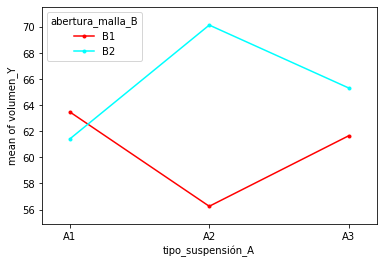

In [ ]:
fig, ax = plt.subplots(figsize=(6, 4))
fig = interaction_plot(
    x        = datos.tipo_suspensión_A,
    trace    = datos.abertura_malla_B,
    response = datos.volumen_Y,
    ax       = ax,
)

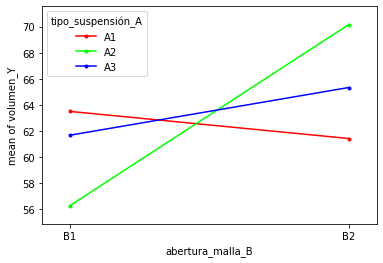

In [ ]:
fig, ax = plt.subplots(figsize=(6, 4))
fig = interaction_plot(
    trace        = datos.tipo_suspensión_A,
    x    = datos.abertura_malla_B,
    response = datos.volumen_Y,
    ax       = ax,
)

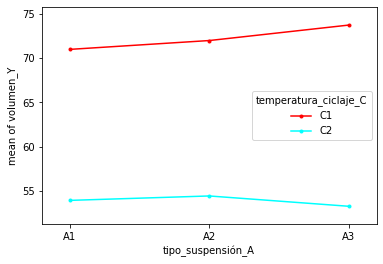

In [ ]:
fig, ax = plt.subplots(figsize=(6, 4))
fig = interaction_plot(
    x        = datos.tipo_suspensión_A,
    trace    = datos.temperatura_ciclaje_C,
    response = datos.volumen_Y,
    ax       = ax,
)

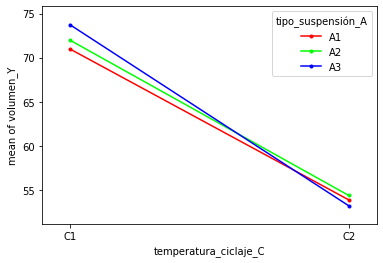

In [ ]:
fig, ax = plt.subplots(figsize=(6, 4))
fig = interaction_plot(
    trace        = datos.tipo_suspensión_A,
    x    = datos.temperatura_ciclaje_C,
    response = datos.volumen_Y,
    ax       = ax,
)

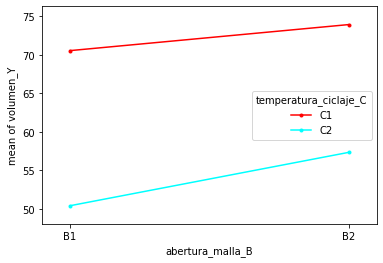

In [ ]:
fig, ax = plt.subplots(figsize=(6, 4))
fig = interaction_plot(
    x        = datos.abertura_malla_B,
    trace    = datos.temperatura_ciclaje_C,
    response = datos.volumen_Y,
    ax       = ax,
)

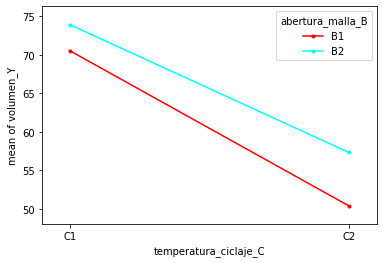

In [ ]:
fig, ax = plt.subplots(figsize=(6, 4))
fig = interaction_plot(
    trace        = datos.abertura_malla_B,
    x    = datos.temperatura_ciclaje_C,
    response = datos.volumen_Y,
    ax       = ax,
)

# **7. Análisis descriptivos - Análisis de Varianza**

In [ ]:
import statsmodels.api as sm
from statsmodels.formula.api import ols

In [ ]:
model2 = ols('volumen_Y ~ tipo_suspensión_A*abertura_malla_B*temperatura_ciclaje_C',                 # Model formula
            data = datos).fit()

anova_result = sm.stats.anova_lm(model2, typ=2)
print (anova_result)

                                                         sum_sq    df  \
tipo_suspensión_A                                     13.861111   2.0   
abertura_malla_B                                     480.500000   1.0   
temperatura_ciclaje_C                               6086.722222   1.0   
tipo_suspensión_A:abertura_malla_B                   788.250000   2.0   
tipo_suspensión_A:temperatura_ciclaje_C               40.861111   2.0   
abertura_malla_B:temperatura_ciclaje_C                56.888889   1.0   
tipo_suspensión_A:abertura_malla_B:temperatura_...    31.027778   2.0   
Residual                                             841.666667  60.0   

                                                             F        PR(>F)  
tipo_suspensión_A                                     0.494059  6.126048e-01  
abertura_malla_B                                     34.253465  2.162425e-07  
temperatura_ciclaje_C                               433.904950  3.745002e-29  
tipo_suspensión_A:abertura

# **7. Análisis descriptivos - Comparaciones múltiples**

In [ ]:
from statsmodels.stats.multicomp import pairwise_tukeyhsd

group1,group2,meandiff,p-adj,lower,upper,reject
A1,A2,0.75,0.9,-6.8456,8.3456,False
A1,A3,1.0417,0.9,-6.554,8.6373,False
A2,A3,0.2917,0.9,-7.304,7.8873,False


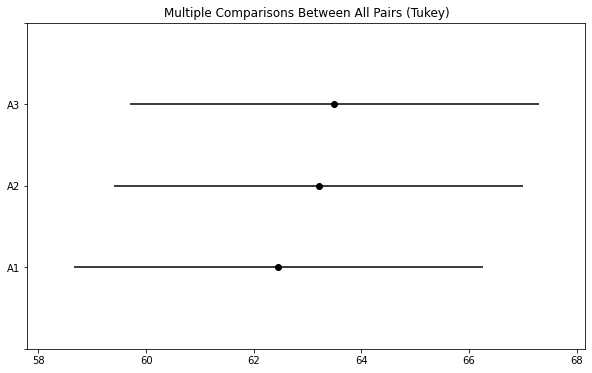

In [ ]:
tukey = pairwise_tukeyhsd(endog=datos["volumen_Y"],     # Data
                          groups=datos["tipo_suspensión_A"],   # Groups
                          alpha=0.05)          # Significance level

tukey.plot_simultaneous()    # Plot group confidence intervals
plt.vlines(x=49.57,ymin=-0.5,ymax=14.5, color="red")

tukey.summary()

In [ ]:
tukey = pairwise_tukeyhsd(endog=datos["volumen_Y"],     # Data
                          groups=datos["abertura_malla_B"],   # Groups
                          alpha=0.05)          # Significance level

#tukey.plot_simultaneous()    # Plot group confidence intervals
#plt.vlines(x=49.57,ymin=-0.5,ymax=14.5, color="red")

tukey.summary()

group1,group2,meandiff,p-adj,lower,upper,reject
B1,B2,5.1667,0.0423,0.1856,10.1478,True


In [ ]:
import statsmodels.stats.multicomp as mc

interaction_groups = "Susp_" + datos.tipo_suspensión_A.astype(str) + " & " + "Aber_" + datos.abertura_malla_B.astype(str)

comp = mc.MultiComparison(datos["volumen_Y"], interaction_groups)
post_hoc_res = comp.tukeyhsd()
post_hoc_res.summary()

group1,group2,meandiff,p-adj,lower,upper,reject
Susp_A1 & Aber_B1,Susp_A1 & Aber_B2,-2.0833,0.9,-14.4734,10.3068,False
Susp_A1 & Aber_B1,Susp_A2 & Aber_B1,-7.25,0.522,-19.6401,5.1401,False
Susp_A1 & Aber_B1,Susp_A2 & Aber_B2,6.6667,0.6001,-5.7234,19.0568,False
Susp_A1 & Aber_B1,Susp_A3 & Aber_B1,-1.8333,0.9,-14.2234,10.5568,False
Susp_A1 & Aber_B1,Susp_A3 & Aber_B2,1.8333,0.9,-10.5568,14.2234,False
Susp_A1 & Aber_B2,Susp_A2 & Aber_B1,-5.1667,0.8012,-17.5568,7.2234,False
Susp_A1 & Aber_B2,Susp_A2 & Aber_B2,8.75,0.3141,-3.6401,21.1401,False
Susp_A1 & Aber_B2,Susp_A3 & Aber_B1,0.25,0.9,-12.1401,12.6401,False
Susp_A1 & Aber_B2,Susp_A3 & Aber_B2,3.9167,0.9,-8.4734,16.3068,False
Susp_A2 & Aber_B1,Susp_A2 & Aber_B2,13.9167,0.0189,1.5266,26.3068,True


In [ ]:
interaction_groups = "Susp_" + datos.tipo_suspensión_A.astype(str) + " & " + "Tem_" + datos.temperatura_ciclaje_C.astype(str)

comp = mc.MultiComparison(datos["volumen_Y"], interaction_groups)
post_hoc_res = comp.tukeyhsd()
post_hoc_res.summary()

group1,group2,meandiff,p-adj,lower,upper,reject
Susp_A1 & Tem_C1,Susp_A1 & Tem_C2,-17.0833,0.001,-23.9986,-10.1681,True
Susp_A1 & Tem_C1,Susp_A2 & Tem_C1,1.0,0.9,-5.9152,7.9152,False
Susp_A1 & Tem_C1,Susp_A2 & Tem_C2,-16.5833,0.001,-23.4986,-9.6681,True
Susp_A1 & Tem_C1,Susp_A3 & Tem_C1,2.75,0.8333,-4.1652,9.6652,False
Susp_A1 & Tem_C1,Susp_A3 & Tem_C2,-17.75,0.001,-24.6652,-10.8348,True
Susp_A1 & Tem_C2,Susp_A2 & Tem_C1,18.0833,0.001,11.1681,24.9986,True
Susp_A1 & Tem_C2,Susp_A2 & Tem_C2,0.5,0.9,-6.4152,7.4152,False
Susp_A1 & Tem_C2,Susp_A3 & Tem_C1,19.8333,0.001,12.9181,26.7486,True
Susp_A1 & Tem_C2,Susp_A3 & Tem_C2,-0.6667,0.9,-7.5819,6.2486,False
Susp_A2 & Tem_C1,Susp_A2 & Tem_C2,-17.5833,0.001,-24.4986,-10.6681,True


In [ ]:
interaction_groups = "Aber_" + datos.abertura_malla_B.astype(str) + " & " + "Tem_" + datos.temperatura_ciclaje_C.astype(str)

comp = mc.MultiComparison(datos["volumen_Y"], interaction_groups)
post_hoc_res = comp.tukeyhsd()
post_hoc_res.summary()

group1,group2,meandiff,p-adj,lower,upper,reject
Aber_B1 & Tem_C1,Aber_B1 & Tem_C2,-20.1667,0.001,-24.5765,-15.7568,True
Aber_B1 & Tem_C1,Aber_B2 & Tem_C1,3.3889,0.1894,-1.0209,7.7987,False
Aber_B1 & Tem_C1,Aber_B2 & Tem_C2,-13.2222,0.001,-17.6321,-8.8124,True
Aber_B1 & Tem_C2,Aber_B2 & Tem_C1,23.5556,0.001,19.1457,27.9654,True
Aber_B1 & Tem_C2,Aber_B2 & Tem_C2,6.9444,0.001,2.5346,11.3543,True
Aber_B2 & Tem_C1,Aber_B2 & Tem_C2,-16.6111,0.001,-21.0209,-12.2013,True


# **8. Análisis descriptivos - Supuestos del Modelo**
## Los supuestos de esta sección deben cumplirse para que los resultados de la prueba se consideren válidos. Aquí se proporciona una mirada más profunda a las suposiciones paramétricas , que incluye algunos remedios potenciales.*

### **INDEPENDENCIA**. *Esta suposición se prueba cuando se diseña el estudio. Lo que esto significa es que todos los grupos son mutuamente excluyentes, es decir, un individuo solo puede pertenecer a un grupo. Además, esto significa que los datos no son medidas repetidas (no se recopilan a lo largo del tiempo). En este ejemplo, esta condición se cumple.*

### **NORMALIDAD**. *El supuesto de normalidad se prueba en los residuos del modelo cuando proviene de un ANOVA o marco de regresión. Un método para probar la suposición de normalidad es la prueba de Shapiro-Wilk. Esto se puede completar usando el método shapiro() de scipy.stats. Asegúrese de importar scipy.stats para que funcione el siguiente método. Desafortunadamente, la salida no está etiquetada, pero sí (estadística de prueba W, valor p).*

# **9. Normalidad - Supuestos del Modelo**

In [ ]:
import scipy.stats as stats

stats.shapiro(model2.resid)

ShapiroResult(statistic=0.919877827167511, pvalue=0.0002114002563757822)

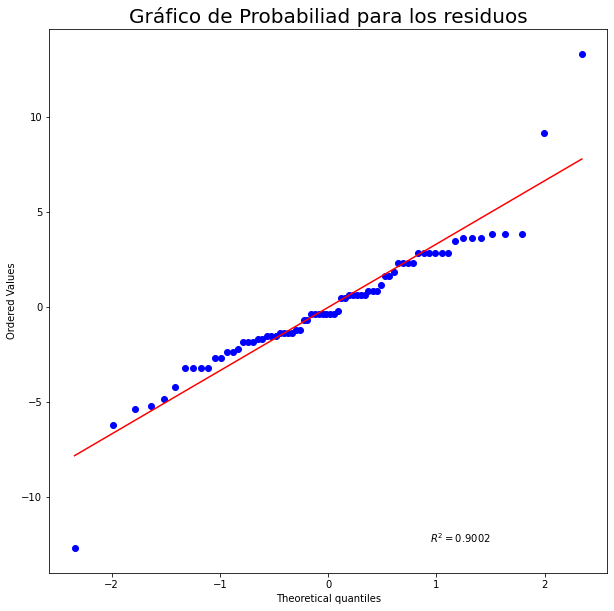

In [ ]:
import matplotlib.pyplot as plt

fig = plt.figure(figsize= (10, 10))
ax = fig.add_subplot(111)

normality_plot, stat = stats.probplot(model2.resid, plot= plt, rvalue= True)
ax.set_title("Gráfico de Probabiliad para los residuos", fontsize= 20)
ax.set

plt.show()

### **Conclusión.**Este es un caso en el que el método de prueba estadística indicó que los residuos no se distribuyeron normalmente segun la prueba de Shapiro-Wilk. Sin embargo, mirando el gráfico de probabilidad trazado y la estructura residual, también sería razonable transformar pensar que no se viola el pricipio de normalidad.

# **10. Supuestos del Modelo - Homocedasticidad**
### La suposición final es que todos los grupos tienen varianzas iguales. Un método para probar esta suposición es la prueba de homogeneidad de varianzas de Levene. Esto se puede completar usando el método levene() de Scipy.stats.*

In [ ]:
stats.levene(datos['volumen_Y'][datos['tipo_suspensión_A'] == 'A1'],
             datos['volumen_Y'][datos['tipo_suspensión_A'] == 'A2'],
             datos['volumen_Y'][datos['tipo_suspensión_A'] == 'A3'])

LeveneResult(statistic=0.5041369720146014, pvalue=0.6062340941488165)

In [ ]:
stats.levene(datos['volumen_Y'][datos['abertura_malla_B'] == 'B1'],
             datos['volumen_Y'][datos['abertura_malla_B'] == 'B2'])

LeveneResult(statistic=1.8959451953341993, pvalue=0.17292063007055783)

In [ ]:
stats.levene(datos['volumen_Y'][datos['temperatura_ciclaje_C'] == 'C1'],
             datos['volumen_Y'][datos['temperatura_ciclaje_C'] == 'C2'])

LeveneResult(statistic=0.06885104813425962, pvalue=0.7937877346577176)

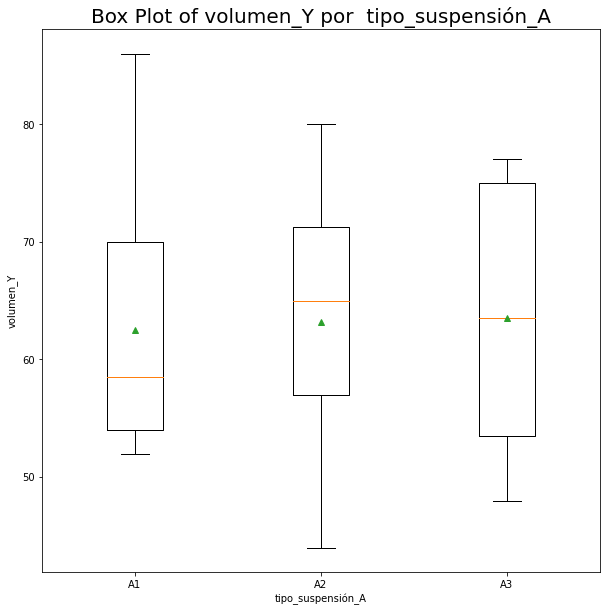

In [ ]:
fig = plt.figure(figsize= (10, 10))
ax = fig.add_subplot(111)

ax.set_title("Box Plot of volumen_Y por  tipo_suspensión_A", fontsize= 20)
ax.set

data = [datos['volumen_Y'][datos['tipo_suspensión_A'] == 'A1'],
             datos['volumen_Y'][datos['tipo_suspensión_A'] == 'A2'],
             datos['volumen_Y'][datos['tipo_suspensión_A'] == 'A3']]

ax.boxplot(data,
           labels= ['A1', 'A2', 'A3'],
           showmeans= True)

plt.xlabel("tipo_suspensión_A")
plt.ylabel("volumen_Y")

plt.show()